### Importação de bibliotecas

In [1]:
import os
import torch
from torch import nn
from pathlib import Path
import random
from PIL import Image
import torchvision
from torchvision import datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchinfo import summary
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt

### Definição do dispositivo de execução

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [3]:
image_path = Path("ASL_Alphabet_Dataset/train")

image_path_list = list(image_path.glob("*/*.jpg"))

print(len(image_path_list))

random_image_path = random.choice(image_path_list)

print(random_image_path)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f'Random image path: {random_image_path}')
print(f'Image Class: {image_class}')
print(f'Image Height: {img.height}')
print(f'Image Width: {img.width}')


147169
ASL_Alphabet_Dataset\train\Y\Y1494.jpg
Random image path: ASL_Alphabet_Dataset\train\Y\Y1494.jpg
Image Class: Y
Image Height: 200
Image Width: 200


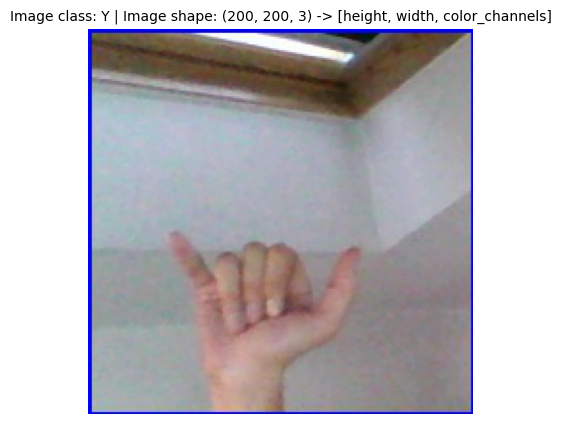

In [4]:
img_as_array = np.asarray(img)

fig = plt.figure(figsize=(6, 5))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]", fontsize = 10)
plt.axis(False)
plt.show()

### Definição da transformação

In [5]:
print(torchvision.__version__)

data_transform = transforms.Compose([
	transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])
data_transform2 = transforms.Compose([
	transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])
transformed_data = data_transform(img)
transformed_data, transformed_data.shape, transformed_data.dtype

0.20.0.dev20240618+cu124


(tensor([[[-2.4291, -2.3515, -2.3321,  ..., -2.3321, -2.3128, -2.3903],
          [-2.3128, -1.3823, -1.0721,  ..., -0.6844, -0.3161, -1.5374],
          [-2.2934, -1.0721, -0.5487,  ...,  0.4787,  0.5174, -1.1884],
          ...,
          [-2.3903, -0.0835,  0.8858,  ...,  0.1685,  0.1491, -1.4404],
          [-2.3515, -0.1223,  0.8276,  ...,  0.1879,  0.1297, -1.4017],
          [-2.4097, -1.4986, -1.1109,  ..., -1.2466, -1.3047, -2.0026]],
 
         [[-2.3396, -2.3593, -2.3199,  ..., -2.3396, -2.3789, -2.3593],
          [-2.3789, -1.4152, -0.9826,  ..., -0.7662, -0.3729, -1.5922],
          [-2.3593, -1.0612, -0.4516,  ...,  0.4728,  0.5711, -1.2382],
          ...,
          [-2.3199,  0.0991,  1.1218,  ...,  0.2368,  0.2564, -1.2776],
          [-2.3396,  0.0598,  1.1021,  ...,  0.0991,  0.0991, -1.3562],
          [-2.3593, -1.4152, -0.9826,  ..., -1.4152, -1.4152, -1.9266]],
 
         [[ 2.6562,  2.3245,  2.1099,  ...,  2.1684,  2.2270,  2.5001],
          [ 2.3245,  0.9588,

### Criação do dataset de imagens

In [6]:
# source_dir = 'ASL_Alphabet_Dataset/train'

# source_data = datasets.ImageFolder(root = source_dir,
#                                   transform = data_transform, # Transforms input data into tensors
#                                   target_transform = None)    # Transform labels into none

# source_data

In [7]:
# from torch.utils.data import random_split

# train_size = int(0.95 * len(source_data))
# test_size = len(source_data) - train_size

# # Split the dataset into train and test sets
# train_data, test_data = random_split(source_data, [train_size, test_size])

# print(f"Train set size: {len(train_data)}")
# print(f"Test set size: {len(test_data)}")

In [8]:
train_dir = 'ASL_Alphabet_Dataset/train'
test_dir = 'ASL_Alphabet_Dataset/test'

train_data = datasets.ImageFolder(root = train_dir, transform = data_transform, target_transform = None)    

test_data = datasets.ImageFolder(root = test_dir, transform = data_transform2, target_transform = None)    


In [9]:
# class_names = source_data.classes
# class_dict = source_data.class_to_idx
# class_dict

In [10]:
train_data

Dataset ImageFolder
    Number of datapoints: 161276
    Root location: ASL_Alphabet_Dataset/train
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )

In [11]:
test_data

Dataset ImageFolder
    Number of datapoints: 6300
    Root location: ASL_Alphabet_Dataset/test
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )

In [12]:
print(f"Train set size: {len(train_data)}")
print(f"Test set size: {len(test_data)}")

Train set size: 161276
Test set size: 6300


In [13]:
class_names = test_data.classes
class_dict = test_data.class_to_idx
class_dict

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'K': 9,
 'L': 10,
 'M': 11,
 'N': 12,
 'O': 13,
 'R': 14,
 'S': 15,
 'T': 16,
 'U': 17,
 'V': 18,
 'W': 19,
 'Y': 20}

In [14]:
class_names = train_data.classes
class_dict = train_data.class_to_idx
class_dict

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'K': 9,
 'L': 10,
 'M': 11,
 'N': 12,
 'O': 13,
 'R': 14,
 'S': 15,
 'T': 16,
 'U': 17,
 'V': 18,
 'W': 19,
 'Y': 20}

In [15]:
img, label = train_data[0][0], train_data[0][1]

img, img.dtype, label, type(label), class_names[label]

(tensor([[[ 0.3236,  0.6725,  0.6725,  ...,  0.5756,  0.5756,  0.5756],
          [ 0.2073,  0.6338,  0.6919,  ...,  0.5756,  0.5756,  0.5562],
          [ 0.1297,  0.5950,  0.6919,  ...,  0.5562,  0.5562,  0.5562],
          ...,
          [ 1.0990,  1.2928,  1.4479,  ..., -2.2546, -2.1964, -2.1577],
          [ 1.0796,  1.3898,  1.5255,  ..., -2.2546, -2.2158, -2.1383],
          [ 1.1378,  1.4673,  1.6030,  ..., -2.2546, -2.2158, -2.1577]],
 
         [[ 0.2171,  0.5514,  0.5318,  ...,  0.4728,  0.4531,  0.4531],
          [ 0.1384,  0.5121,  0.5318,  ...,  0.4531,  0.4531,  0.4334],
          [ 0.0794,  0.4924,  0.5514,  ...,  0.4728,  0.4334,  0.4334],
          ...,
          [ 1.2004,  1.4168,  1.5741,  ..., -2.2413, -2.1823, -2.1429],
          [ 1.2004,  1.5348,  1.6724,  ..., -2.2413, -2.2019, -2.1233],
          [ 1.2594,  1.6134,  1.7314,  ..., -2.2413, -2.2019, -2.1429]],
 
         [[ 0.1003,  0.3930,  0.3735,  ...,  0.4515,  0.4515,  0.4515],
          [ 0.0418,  0.3540,

In [16]:
img_permute = img.permute(1, 2, 0)
img.shape, img_permute.shape


(torch.Size([3, 128, 128]), torch.Size([128, 128, 3]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


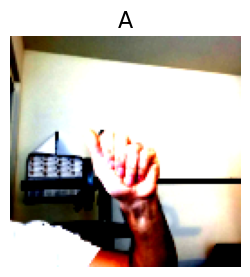

In [17]:
plt.figure(figsize = (3, 3))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize = 16); 

### Criação dos dataloaders

In [18]:
batch_size = 256
train_dataloader = DataLoader(dataset = train_data, batch_size = batch_size, num_workers = 1, shuffle = True)

test_dataloader = DataLoader(dataset = test_data, batch_size = batch_size, num_workers = 1,shuffle = False)

len(train_dataloader), len(test_dataloader)

(630, 25)

In [19]:
img, label = next(iter(train_dataloader))

img.shape, label.shape   

(torch.Size([256, 3, 128, 128]), torch.Size([256]))

### Rede de classificação utilizada

In [29]:
# Entrada: 128x128

class INF692Net(torch.nn.Module):
    def __init__(self):
        super(INF692Net, self).__init__()

        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size = 2, stride = 2)) # 64x64
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(), 
            torch.nn.MaxPool2d(kernel_size = 2, stride = 2)) # 32x32
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size = 2, stride = 2)) # 16x16
        self.fc = torch.nn.Sequential(
            torch.nn.Linear(16*16*128, 64),
            torch.nn.ReLU())
        self.fc1 = torch.nn.Sequential(
            torch.nn.Linear(64, 128),
            torch.nn.ReLU())
        self.fc2 = torch.nn.Sequential(
            torch.nn.Dropout(0.25),
            torch.nn.Linear(128, 128),
            torch.nn.ReLU())
        self.fc3= torch.nn.Sequential(
            torch.nn.Dropout(0.25),
            torch.nn.Linear(128, 21))

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out

### Trainamento

In [28]:
def train_(model, train_dataloader, loss_function, optimizer):
    model.train()
    train_loss, train_acc = 0, 0

    for x, y in train_dataloader:
        x, y = x.to(device), y.to(device)
        y_hat = model(x)

        loss = loss_function(y_hat, y)
        train_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        precict_class = torch.argmax(torch.softmax(y_hat, dim=1), dim=1)
        train_acc += (precict_class == y).sum().item()/len(y_hat)

    train_loss = train_loss / len(train_dataloader)
    train_acc = train_acc / len(train_dataloader)
    return train_loss, train_acc

def test_(model, test_dataloader, loss_function):
    model.eval()
    test_loss, test_acc = 0, 0

    with torch.inference_mode():
        for x, y in test_dataloader:
            x, y = x.to(device), y.to(device)

            y_hat = model(x)
            loss = loss_function(y_hat, y)
            test_loss += loss.item()

            precict_class = y_hat.argmax(dim=1)
            test_acc += ((precict_class == y).sum().item()/len(precict_class))

    test_loss = test_loss / len(test_dataloader)
    test_acc = test_acc / len(test_dataloader)
    return test_loss, test_acc

In [25]:
def optimize(model, train_dataloader, test_dataloader, optimizer, loss_function, epochs, resultsAux):

  
  results = {"train_loss": [], "train_acc": [], "test_loss":[], "test_acc": []}

  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_(model = model,
                                       train_dataloader = train_dataloader,
                                       optimizer = optimizer,
                                       loss_function = loss_function)

    test_loss, test_acc = test_(model = model,
                                     test_dataloader = test_dataloader,
                                     loss_function = loss_function)

    print(f'Epoch: {epoch} | Train loss: {train_loss:.4f} - Train acc: {(train_acc*100):.2f}% -  Test loss: {test_loss:.4f} - Test acc: {(test_acc*100):.2f}%')
    
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
    
    resultsAux["train_loss"].append(train_loss)
    resultsAux["train_acc"].append(train_acc)
    resultsAux["test_loss"].append(test_loss)
    resultsAux["test_acc"].append(test_acc)
    
    with open('trainingresults.txt', 'a') as f:
        f.write("Epoch\tTrain Loss\tTrain Acc\tTest Loss\tTest Acc\n")
        f.write(f"{epoch}\t{results['train_loss'][epoch]:.4f}\t{(results['train_acc'][epoch]*100):.2f}%\t{results['test_loss'][epoch]:.4f}\t{(results['test_acc'][epoch]*100):.2f}%\n")
    

  return results

In [27]:
model = INF692Net().to(device)
summary(model=model)

Layer (type:depth-idx)                   Param #
INF692Net                                --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       896
│    └─BatchNorm2d: 2-2                  64
│    └─ReLU: 2-3                         --
│    └─MaxPool2d: 2-4                    --
├─Sequential: 1-2                        --
│    └─Conv2d: 2-5                       18,496
│    └─BatchNorm2d: 2-6                  128
│    └─ReLU: 2-7                         --
│    └─MaxPool2d: 2-8                    --
├─Sequential: 1-3                        --
│    └─Conv2d: 2-9                       73,856
│    └─BatchNorm2d: 2-10                 256
│    └─ReLU: 2-11                        --
│    └─MaxPool2d: 2-12                   --
├─Sequential: 1-4                        --
│    └─Linear: 2-13                      2,097,216
│    └─ReLU: 2-14                        --
├─Sequential: 1-5                        --
│    └─Linear: 2-15                      8,320
│    └

In [31]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr=0.001)

In [32]:
torch.manual_seed(42)

from timeit import default_timer as timer
start_time = timer()

resultsAux = {"train_loss": [],
             "train_acc": [],
             "test_loss":[],
             "test_acc": []}


for i in range(12):
    EPOCHS = 5
    model_results = optimize(model = model,
                          train_dataloader = train_dataloader,
                          test_dataloader = test_dataloader,
                          optimizer = optimizer,
                          loss_function = loss_function,
                          epochs = EPOCHS, resultsAux = resultsAux)
    
    MODEL_PATH = Path("models")
    MODEL_PATH.mkdir(parents=True,
                     exist_ok=True)

    
    MODEL_NAME = f"INF692NetHenriqueI{i}.pth"
    MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

    
    print(f"Saving model to: {MODEL_SAVE_PATH}")
    torch.save(obj=model.state_dict(),
               f=MODEL_SAVE_PATH)
    
    

end_time = timer()
print(f'Total Train Time: {end_time - start_time:.3f} seconds')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.9234 - Train acc: 33.86% -  Test loss: 1.2734 - Test acc: 53.19%
Epoch: 1 | Train loss: 1.1070 - Train acc: 60.84% -  Test loss: 0.8108 - Test acc: 71.84%
Epoch: 2 | Train loss: 0.8642 - Train acc: 70.01% -  Test loss: 0.7045 - Test acc: 75.43%
Epoch: 3 | Train loss: 0.7281 - Train acc: 75.02% -  Test loss: 0.6308 - Test acc: 77.65%
Epoch: 4 | Train loss: 0.6422 - Train acc: 78.01% -  Test loss: 0.5695 - Test acc: 79.83%
Saving model to: models\INF692NetHenriqueI0.pth


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.5813 - Train acc: 80.14% -  Test loss: 0.4917 - Test acc: 82.14%
Epoch: 1 | Train loss: 0.5296 - Train acc: 81.99% -  Test loss: 0.4246 - Test acc: 85.43%
Epoch: 2 | Train loss: 0.4919 - Train acc: 83.31% -  Test loss: 0.4037 - Test acc: 86.53%
Epoch: 3 | Train loss: 0.4547 - Train acc: 84.60% -  Test loss: 0.4432 - Test acc: 84.64%
Epoch: 4 | Train loss: 0.4251 - Train acc: 85.67% -  Test loss: 0.3470 - Test acc: 88.02%
Saving model to: models\INF692NetHenriqueI1.pth


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.3978 - Train acc: 86.47% -  Test loss: 0.3074 - Test acc: 89.64%
Epoch: 1 | Train loss: 0.3705 - Train acc: 87.48% -  Test loss: 0.3080 - Test acc: 89.62%
Epoch: 2 | Train loss: 0.3493 - Train acc: 88.31% -  Test loss: 0.3092 - Test acc: 89.61%
Epoch: 3 | Train loss: 0.3247 - Train acc: 89.11% -  Test loss: 0.2616 - Test acc: 91.26%
Epoch: 4 | Train loss: 0.3102 - Train acc: 89.62% -  Test loss: 0.2356 - Test acc: 92.44%
Saving model to: models\INF692NetHenriqueI2.pth


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.2910 - Train acc: 90.28% -  Test loss: 0.2333 - Test acc: 92.32%
Epoch: 1 | Train loss: 0.2679 - Train acc: 91.06% -  Test loss: 0.2167 - Test acc: 93.06%
Epoch: 2 | Train loss: 0.2546 - Train acc: 91.52% -  Test loss: 0.2265 - Test acc: 92.45%
Epoch: 3 | Train loss: 0.2422 - Train acc: 91.94% -  Test loss: 0.1770 - Test acc: 94.36%
Epoch: 4 | Train loss: 0.2261 - Train acc: 92.51% -  Test loss: 0.2015 - Test acc: 93.17%
Saving model to: models\INF692NetHenriqueI3.pth


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.2192 - Train acc: 92.66% -  Test loss: 0.1693 - Test acc: 94.47%
Epoch: 1 | Train loss: 0.2071 - Train acc: 93.15% -  Test loss: 0.2573 - Test acc: 91.92%
Epoch: 2 | Train loss: 0.1992 - Train acc: 93.39% -  Test loss: 0.1854 - Test acc: 93.47%
Epoch: 3 | Train loss: 0.1919 - Train acc: 93.66% -  Test loss: 0.1739 - Test acc: 94.42%
Epoch: 4 | Train loss: 0.1871 - Train acc: 93.81% -  Test loss: 0.1611 - Test acc: 94.70%
Saving model to: models\INF692NetHenriqueI4.pth


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.1755 - Train acc: 94.24% -  Test loss: 0.1493 - Test acc: 95.39%
Epoch: 1 | Train loss: 0.1715 - Train acc: 94.36% -  Test loss: 0.1779 - Test acc: 94.36%
Epoch: 2 | Train loss: 0.1656 - Train acc: 94.58% -  Test loss: 0.1534 - Test acc: 95.12%
Epoch: 3 | Train loss: 0.1597 - Train acc: 94.85% -  Test loss: 0.1471 - Test acc: 95.22%
Epoch: 4 | Train loss: 0.1548 - Train acc: 95.06% -  Test loss: 0.1526 - Test acc: 94.98%
Saving model to: models\INF692NetHenriqueI5.pth


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.1437 - Train acc: 95.36% -  Test loss: 0.1263 - Test acc: 95.92%
Epoch: 1 | Train loss: 0.1430 - Train acc: 95.39% -  Test loss: 0.1875 - Test acc: 94.38%
Epoch: 2 | Train loss: 0.1398 - Train acc: 95.50% -  Test loss: 0.1286 - Test acc: 95.90%
Epoch: 3 | Train loss: 0.1366 - Train acc: 95.61% -  Test loss: 0.1606 - Test acc: 95.09%
Epoch: 4 | Train loss: 0.1315 - Train acc: 95.73% -  Test loss: 0.1132 - Test acc: 96.43%
Saving model to: models\INF692NetHenriqueI6.pth


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.1254 - Train acc: 96.02% -  Test loss: 0.1215 - Test acc: 96.39%
Epoch: 1 | Train loss: 0.1231 - Train acc: 96.04% -  Test loss: 0.1042 - Test acc: 96.48%
Epoch: 2 | Train loss: 0.1188 - Train acc: 96.21% -  Test loss: 0.1549 - Test acc: 95.34%
Epoch: 3 | Train loss: 0.1194 - Train acc: 96.23% -  Test loss: 0.1014 - Test acc: 96.75%
Epoch: 4 | Train loss: 0.1121 - Train acc: 96.42% -  Test loss: 0.1074 - Test acc: 96.61%
Saving model to: models\INF692NetHenriqueI7.pth


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.1118 - Train acc: 96.39% -  Test loss: 0.1152 - Test acc: 96.46%
Epoch: 1 | Train loss: 0.1059 - Train acc: 96.61% -  Test loss: 0.0979 - Test acc: 96.98%
Epoch: 2 | Train loss: 0.1074 - Train acc: 96.57% -  Test loss: 0.1056 - Test acc: 96.75%
Epoch: 3 | Train loss: 0.1069 - Train acc: 96.58% -  Test loss: 0.1126 - Test acc: 96.17%
Epoch: 4 | Train loss: 0.1005 - Train acc: 96.79% -  Test loss: 0.0948 - Test acc: 97.03%
Saving model to: models\INF692NetHenriqueI8.pth


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.0945 - Train acc: 96.93% -  Test loss: 0.1109 - Test acc: 96.43%
Epoch: 1 | Train loss: 0.0983 - Train acc: 96.87% -  Test loss: 0.1015 - Test acc: 96.82%
Epoch: 2 | Train loss: 0.0953 - Train acc: 96.98% -  Test loss: 0.0918 - Test acc: 97.19%
Epoch: 3 | Train loss: 0.0928 - Train acc: 97.09% -  Test loss: 0.0999 - Test acc: 97.01%
Epoch: 4 | Train loss: 0.0941 - Train acc: 96.99% -  Test loss: 0.1043 - Test acc: 96.82%
Saving model to: models\INF692NetHenriqueI9.pth


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.0914 - Train acc: 97.13% -  Test loss: 0.1127 - Test acc: 96.68%
Epoch: 1 | Train loss: 0.0863 - Train acc: 97.25% -  Test loss: 0.0867 - Test acc: 97.32%
Epoch: 2 | Train loss: 0.0907 - Train acc: 97.14% -  Test loss: 0.0872 - Test acc: 97.49%
Epoch: 3 | Train loss: 0.0875 - Train acc: 97.20% -  Test loss: 0.0826 - Test acc: 97.11%
Epoch: 4 | Train loss: 0.0791 - Train acc: 97.46% -  Test loss: 0.0910 - Test acc: 97.18%
Saving model to: models\INF692NetHenriqueI10.pth


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.0839 - Train acc: 97.35% -  Test loss: 0.0954 - Test acc: 97.06%
Epoch: 1 | Train loss: 0.0827 - Train acc: 97.36% -  Test loss: 0.0835 - Test acc: 97.27%
Epoch: 2 | Train loss: 0.0784 - Train acc: 97.54% -  Test loss: 0.0930 - Test acc: 97.03%
Epoch: 3 | Train loss: 0.0803 - Train acc: 97.44% -  Test loss: 0.1079 - Test acc: 96.48%
Epoch: 4 | Train loss: 0.0761 - Train acc: 97.55% -  Test loss: 0.1442 - Test acc: 96.52%
Saving model to: models\INF692NetHenriqueI11.pth
Total Train Time: 19441.099 seconds


In [ ]:
model_results.keys()


In [37]:
def plot_loss_curves(results):
    """ Plots training curves of a results dictionary """

    loss = results['train_loss']
    test_loss = results['test_loss']
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    epochs = range(len(results['train_loss']))

    plt.figure(figsize=(15, 4))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

In [39]:
import matplotlib.pyplot as plt

def plot_loss_curves(results, max_epoch=55):
    """ Plots training curves of a results dictionary up to a maximum epoch """

    loss = results['train_loss'][:max_epoch]
    test_loss = results['test_loss'][:max_epoch]
    accuracy = results['train_acc'][:max_epoch]
    test_accuracy = results['test_acc'][:max_epoch]

    epochs = range(max_epoch)

    plt.figure(figsize=(15, 4))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [ ]:
plot_loss_curves(model_results)

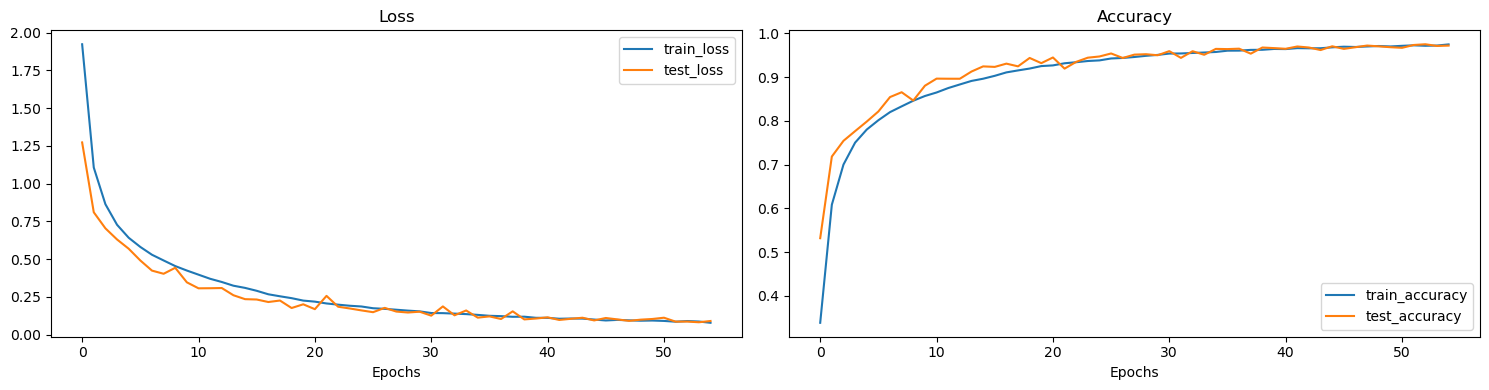

In [40]:
plot_loss_curves(resultsAux)

In [ ]:


MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

MODEL_NAME = "INF692NetHenrique5.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)

In [ ]:
loaded_model = INF692Net().to('cpu')

loaded_model.load_state_dict(torch.load('models/INF692NetHenrique.pth', map_location=torch.device(device)))

print(f"Model on device:\n{next(loaded_model.parameters()).device}")

In [ ]:
def make_predictions(model, data, device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim = 0).to(device)
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)
      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [ ]:

# random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k = 30):
  test_samples.append(sample)
  test_labels.append(label)

In [ ]:
loaded_pred_probs = make_predictions(loaded_model,
                                     test_samples,
                                     device)

loaded_pred_classes = loaded_pred_probs.argmax(dim = 1)

In [ ]:
plt.figure(figsize=(16, 12))
nrows, ncols = 5, 6

for i, sample in enumerate(test_samples):
  class_name = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M',
                      'N', 'O', 'R', 'S', 'T', 'U', 'V', 'W', 'Y'])
  plt.subplot(nrows, ncols, i + 1)
  normalized_sample = sample.permute(1, 2, 0).numpy()
  plt.imshow(normalized_sample)

  pred_label = class_name[loaded_pred_classes[i]]
  truth_label = class_name[test_labels[i]]
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"  
    
  if pred_label == truth_label:
      plt.title(title_text, fontsize=9, c="g")
  else:
      plt.title(title_text, fontsize=9, c="r")

  plt.axis(False);